In [18]:
#library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score

import pickle
import joblib

In [2]:
#read file

df = pd.read_csv('C:/Binus/Semester 4/Machine Learning/AoL/dataset/recruitment_data.csv')

Explore Data

In [3]:
#show head data
df.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0


In [4]:
#find missing value
df.isnull().sum()

Age                    0
Gender                 0
EducationLevel         0
ExperienceYears        0
PreviousCompanies      0
DistanceFromCompany    0
InterviewScore         0
SkillScore             0
PersonalityScore       0
RecruitmentStrategy    0
HiringDecision         0
dtype: int64

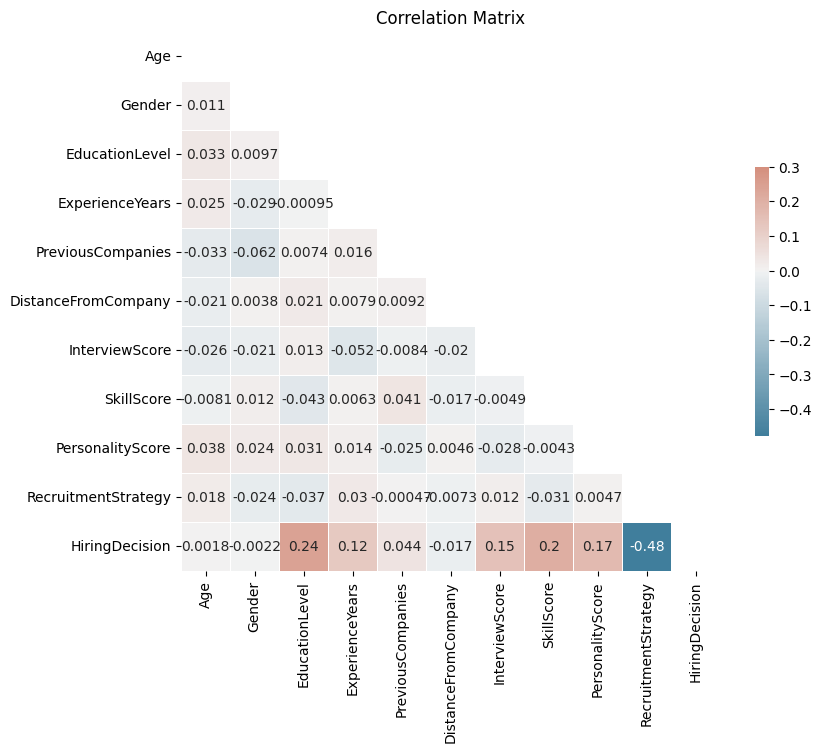

In [5]:
# show correlation
corr = df.corr()

#mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(9, 7))

#custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.title("Correlation Matrix")
plt.show()

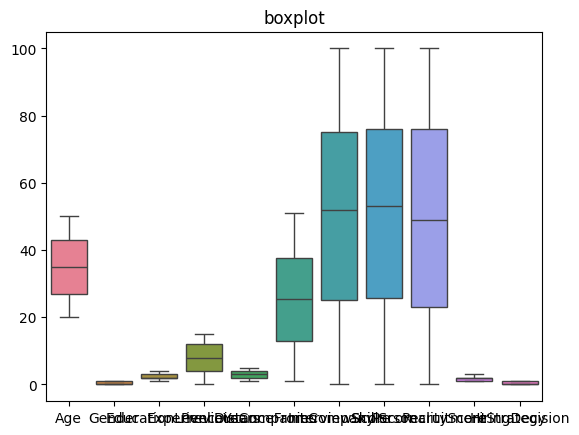

In [6]:
sns.boxplot(df)
plt.title("boxplot")
plt.show()

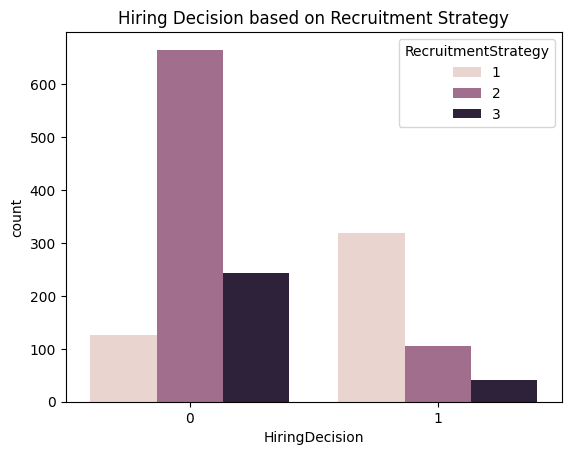

In [7]:
sns.countplot(df,x='HiringDecision', hue= 'RecruitmentStrategy')
plt.title("Hiring Decision based on Recruitment Strategy")
plt.show()

In [8]:
temp_df = df

In [9]:
temp_df = temp_df.drop(["Age", "Gender", "DistanceFromCompany"], axis = 1)
temp_df.head()

,EducationLevel,ExperienceYears,PreviousCompanies,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,2,0,3,48,78,91,1,1
1,4,12,3,35,68,80,2,1
2,2,3,2,20,67,13,2,0
3,2,5,2,36,27,70,3,0
4,1,6,1,23,52,85,2,0


In [10]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

SPLITTING DATA

In [11]:
x_tmp = temp_df.drop("HiringDecision",axis = 1)
y_tmp = temp_df["HiringDecision"]
x_tmp.shape, y_tmp.shape

((1500, 7), (1500,))

In [12]:
tmp_x_train, tmp_x_test, tmp_y_train, tmp_y_test = train_test_split(x_tmp, y_tmp, train_size= .75)

In [13]:
tmp_model_performance = {}


Classification with Logistic Regression:
------------------------------
Accuracy : 86.67%


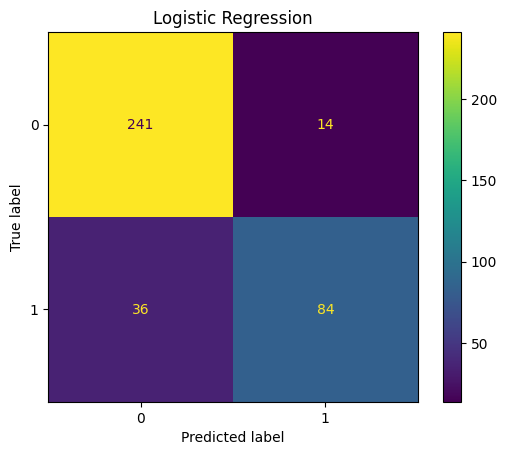


**Classification Report**:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91       255
           1       0.86      0.70      0.77       120

    accuracy                           0.87       375
   macro avg       0.86      0.82      0.84       375
weighted avg       0.87      0.87      0.86       375



Classification with K-Nearest Neighbors:
------------------------------
Accuracy : 64.27%


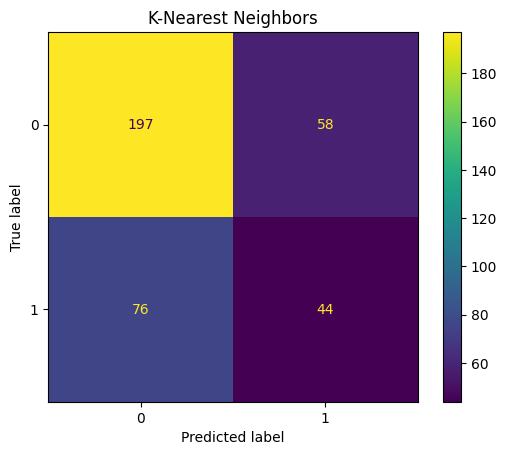


**Classification Report**:
               precision    recall  f1-score   support

           0       0.72      0.77      0.75       255
           1       0.43      0.37      0.40       120

    accuracy                           0.64       375
   macro avg       0.58      0.57      0.57       375
weighted avg       0.63      0.64      0.63       375



Classification with Decision Tree:
------------------------------
Accuracy : 88.00%


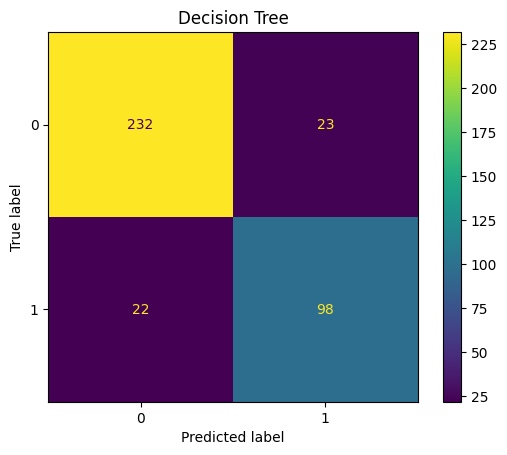


**Classification Report**:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       255
           1       0.81      0.82      0.81       120

    accuracy                           0.88       375
   macro avg       0.86      0.86      0.86       375
weighted avg       0.88      0.88      0.88       375



Classification with Random Forest:
------------------------------
Accuracy : 93.87%


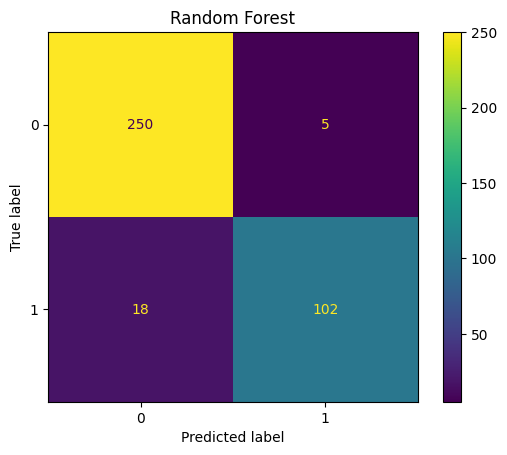


**Classification Report**:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96       255
           1       0.95      0.85      0.90       120

    accuracy                           0.94       375
   macro avg       0.94      0.92      0.93       375
weighted avg       0.94      0.94      0.94       375



Classification with Support Vector Machine:
------------------------------
Accuracy : 70.13%


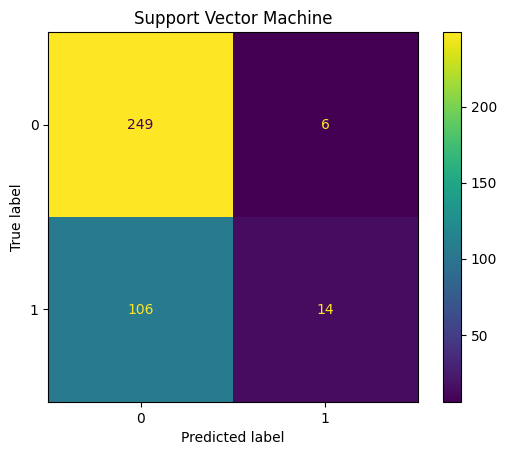


**Classification Report**:
               precision    recall  f1-score   support

           0       0.70      0.98      0.82       255
           1       0.70      0.12      0.20       120

    accuracy                           0.70       375
   macro avg       0.70      0.55      0.51       375
weighted avg       0.70      0.70      0.62       375




In [28]:
#apply model
for model_name, model in models.items():
    print(f"\n\033[1mClassification with {model_name}:\033[0m\n{'-' * 30}")
    model.fit(tmp_x_train, tmp_y_train)
    tmp_y_pred = model.predict(tmp_x_test)
    
    tmp_accuracy = accuracy_score(tmp_y_test, tmp_y_pred)
    tmp_f1 = f1_score(tmp_y_test, tmp_y_pred, average='weighted')
    tmp_model_performance[model_name] = (tmp_accuracy, tmp_f1)
    cm = metrics.confusion_matrix(tmp_y_test, tmp_y_pred)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)

    print('Accuracy : {:.2f}%'.format(tmp_accuracy*100))
    disp.plot()
    plt.title(f"{model_name}")
    plt.show() 
    print("\n\033[1m**Classification Report**:\033[0m\n", classification_report(tmp_y_test, tmp_y_pred))
    print("")

In [15]:
tmp_top_models = sorted(tmp_model_performance.items(), key=lambda x: x[1][1], reverse=True)[:1]

In [16]:
print("\n\033[1mTop Model based on F1 Score:\033[0m\n", tmp_top_models)


Top Model based on F1 Score:
 [('Random Forest', (0.9386666666666666, 0.9374984126984127))]


In [17]:
forest = RandomForestClassifier()
forest.fit(tmp_x_train, tmp_y_train)
prediction = forest.predict(tmp_x_test)

print("Random Forest")
print(f'Accuracy: {accuracy_score(tmp_y_test, prediction)}')
print(confusion_matrix(tmp_y_test, prediction))
print(classification_report(tmp_y_test, prediction))

Random Forest
Accuracy: 0.9413333333333334
[[250   5]
 [ 17 103]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       255
           1       0.95      0.86      0.90       120

    accuracy                           0.94       375
   macro avg       0.95      0.92      0.93       375
weighted avg       0.94      0.94      0.94       375

